# Conjoint Analysis


In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import preprocessing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [18]:
dataset = pd.read_csv("C:/Users/sa/Documents/fid_416603781_files/416603781_hotel_amenities_7946151897509694.csv")

In [19]:
dataset.head(5)

,WiFi_Network,breakfast,parking,gym,flex_check,shuttle_bus,air_pure,jacuzzi,VIP_shop,pool_temp,avg_rating
0,Basic,None,Valet,None,No,No,No,No,No,76,4.57
1,Basic,None,Valet,None,No,No,No,No,No,80,7.60
2,Basic,None,Valet,None,No,No,No,No,No,84,5.66
3,Basic,None,Valet,None,No,No,No,No,Yes,76,2.80
4,Basic,None,Valet,None,No,No,No,No,Yes,80,4.56


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6912 entries, 0 to 6911
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WiFi_Network  6912 non-null   object 
 1   breakfast     6912 non-null   object 
 2   parking       6912 non-null   object 
 3   gym           6912 non-null   object 
 4   flex_check    6912 non-null   object 
 5   shuttle_bus   6912 non-null   object 
 6   air_pure      6912 non-null   object 
 7   jacuzzi       6912 non-null   object 
 8   VIP_shop      6912 non-null   object 
 9   pool_temp     6912 non-null   int64  
 10  avg_rating    6912 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 594.1+ KB


In [21]:
dataset.isnull().sum()

WiFi_Network    0
breakfast       0
parking         0
gym             0
flex_check      0
shuttle_bus     0
air_pure        0
jacuzzi         0
VIP_shop        0
pool_temp       0
avg_rating      0
dtype: int64

In [22]:
xdum = pd.get_dummies(dataset, drop_first=True, columns=['WiFi_Network', 'breakfast', 'parking', 'gym', 'flex_check', 'shuttle_bus', 'air_pure', 'jacuzzi', 'VIP_shop', 'pool_temp'])
xdum.head()

,avg_rating,WiFi_Network_Best in Class,WiFi_Network_Strong,breakfast_Full Buffet,breakfast_None,parking_Valet,gym_Basic,gym_None,gym_Super,flex_check_Yes,shuttle_bus_Yes,air_pure_Yes,jacuzzi_Yes,VIP_shop_Yes,pool_temp_80,pool_temp_84
0,4.57,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
1,7.60,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0
2,5.66,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1
3,2.80,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0
4,4.56,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0


In [23]:
xdum.columns
X = xdum[['WiFi_Network_Best in Class','WiFi_Network_Strong','breakfast_Full Buffet','breakfast_None','parking_Valet',
          'gym_Basic','gym_None', 'gym_Super','flex_check_Yes','shuttle_bus_Yes','air_pure_Yes','jacuzzi_Yes',
          'VIP_shop_Yes','pool_temp_80', 'pool_temp_84']]
y = xdum['avg_rating']
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
lr = regressor.fit(X, y)
regressor.intercept_
coef_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coef_df

,Coefficient
WiFi_Network_Best in Class,1.726814
WiFi_Network_Strong,1.187700
breakfast_Full Buffet,0.500998
breakfast_None,-0.225924
parking_Valet,0.093678
gym_Basic,-0.146314
gym_None,-0.168484
gym_Super,0.044363
flex_check_Yes,0.478220
shuttle_bus_Yes,0.419939


In [27]:
X = xdum[['WiFi_Network_Best in Class','WiFi_Network_Strong','breakfast_Full Buffet','breakfast_None','parking_Valet',
          'gym_Basic','gym_None', 'gym_Super','flex_check_Yes','shuttle_bus_Yes','air_pure_Yes','jacuzzi_Yes',
          'VIP_shop_Yes','pool_temp_80', 'pool_temp_84']]
X = sm.add_constant(X)
Y = xdum['avg_rating']
linearRegression = sm.OLS(Y, X).fit()
linearRegression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_rating   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     175.7
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        03:34:11   Log-Likelihood:                -12176.
No. Observations:                6912   AIC:                         2.438e+04
Df Residuals:                    6896   BIC:                         2.449e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          5.5280      0.068     81.468      0.000       5.395       5.661
WiFi_Network_Best in Class     1.7268      0.042     41.558      0.000       1.645       1.808
WiFi_Network_Strong            1.1877      0.042     28.583      0.000       1.106       1.269
breakfast_Full Buffet          0.5010      0.042     12.057      0.000       0.420       0.582
breakfast_None                -0.2259      0.042     -5.437      0.000      -0.307      -0.144
parking_Valet                  0.0937      0.034      2.761      0.006       0.027       0.160
gym_Basic                     -0.1463      0.048     -3.049      0.002      -0.240      -0.052
gym_None                      -0.1685      0.048     -3.512      0.000      -0.263      -0.074
gym_Super                      0.0444      0.048      0.925      0.355      -0.050       0.138
flex_check_Yes                 0.4782      0.034     14.096      0.000       0.412       0.545
shuttle_bus_Yes                0.4199      0.034     12.378      0.000       0.353       0.486
air_pure_Yes                   0.0753      0.034      2.218      0.027       0.009       0.142
jacuzzi_Yes                    0.1839      0.034      5.421      0.000       0.117       0.250
VIP_shop_Yes                   0.2179      0.034      6.423      0.000       0.151       0.284
pool_temp_80                   0.0747      0.042      1.799      0.072      -0.007       0.156
pool_temp_84                   0.2638      0.042      6.349      0.000       0.182       0.345
==============================================================================
Omnibus:                      153.138   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.951
Skew:                          -0.370   Prob(JB):                     4.13e-36
Kurtosis:                       3.130   Cond. No.                         9.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

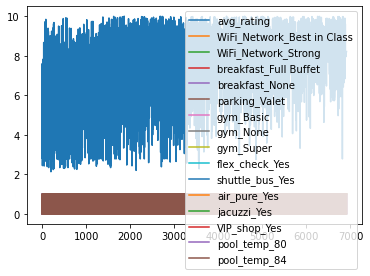

In [24]:
xdum.plot()

Bringing in the second dataset


In [5]:
dataset = pd.read_csv("C:/Users/sa/Documents/fid_416603781_files (1)/416603781_amenity_costs_1209170245279089.csv")

In [6]:
dataset.head(5)

,Amenity,Level,"Estimated Incremental Cost,\nPer Visitor/Per Night"
0,WiFi_Network,Basic,11.75
1,WiFi_Network,Strong,16.25
2,WiFi_Network,Best in Class,19.15
3,breakfast,None,0.00
4,breakfast,Continental,13.25


In [7]:
dataset.describe()

,"Estimated Incremental Cost,\nPer Visitor/Per Night"
count,25.000000
mean,20.588000
std,21.775264
min,0.000000
25%,0.000000
50%,13.250000
75%,35.000000
max,75.000000


In [8]:
dataset.groupby(["Amenity"])[["Estimated Incremental Cost,\nPer Visitor/Per Night"]].sum()

,"Estimated Incremental Cost,\nPer Visitor/Per Night"
Amenity,
VIP_shop,12.00
WiFi_Network,47.15
air_pure,12.85
breakfast,35.70
flex_check,12.00
gym,110.00
jacuzzi,40.00
parking,75.00
pool temp,95.00


In [9]:
pd.pivot_table(dataset,index=["Amenity","Level"])

Estimated Incremental Cost,\nPer Visitor/Per Night
Amenity      Level                                                            
VIP_shop     No                                                          0.00 
             Yes                                                        12.00 
WiFi_Network Basic                                                      11.75 
             Best in Class                                              19.15 
             Strong                                                     16.25 
air_pure     No                                                          0.00 
             Yes                                                        12.85 
breakfast    Continental                                                13.25 
             Full Buffet                                                22.45 
             None                                                        0.00 
flex_check   No                                                          0.00 
             Yes                                                        12.00 
gym          Advanced                                                   35.00 
             Basic                                                      10.00 
             None                                                        0.00 
             Super                                                      65.00 
jacuzzi      No                                                          0.00 
             Yes                                                        40.00 
parking      Open Lot                                                   15.00 
             Valet                                                      60.00 
pool temp    76                                                         15.00 
             80                                                         35.00 
             84                                                         45.00 
shuttle_bus  No                                                          0.00 
             Yes                                                        75.00

<AxesSubplot:>

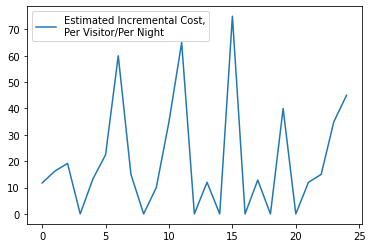

In [10]:
dataset.plot()

In [11]:
dft = dataset.T
dft

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Amenity,WiFi_Network,WiFi_Network,WiFi_Network,breakfast,breakfast,breakfast,parking,parking,gym,gym,...,shuttle_bus,air_pure,air_pure,jacuzzi,jacuzzi,VIP_shop,VIP_shop,pool temp,pool temp,pool temp
Level,Basic,Strong,Best in Class,None,Continental,Full Buffet,Valet,Open Lot,None,Basic,...,Yes,No,Yes,No,Yes,No,Yes,76,80,84
"Estimated Incremental Cost,\nPer Visitor/Per Night",11.75,16.25,19.15,0.0,13.25,22.45,60.0,15.0,0.0,10.0,...,75.0,0.0,12.85,0.0,40.0,0.0,12.0,15.0,35.0,45.0


In [12]:
column_list = list(dft)
print(column_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [13]:
column_list.remove(0)
column_list.remove(1)
column_list.remove(3)
column_list.remove(5)
column_list.remove(6)
column_list.remove(8)
column_list.remove(9)
column_list.remove(11)
column_list.remove(12)
column_list.remove(14)
column_list.remove(16)
column_list.remove(18)
column_list.remove(20)
column_list.remove(23)
column_list.remove(24)
print(column_list)

[2, 4, 7, 10, 13, 15, 17, 19, 21, 22]


In [14]:
dft["sum"] = dft[column_list].sum(axis = 1)
dft["sum"]

Amenity                                               WiFi_Networkbreakfastparkinggymflex_checkshutt...
Level                                                 Best in ClassContinentalOpen LotAdvancedYesYes...
Estimated Incremental Cost,\nPer Visitor/Per Night                                               249.25
Name: sum, dtype: object

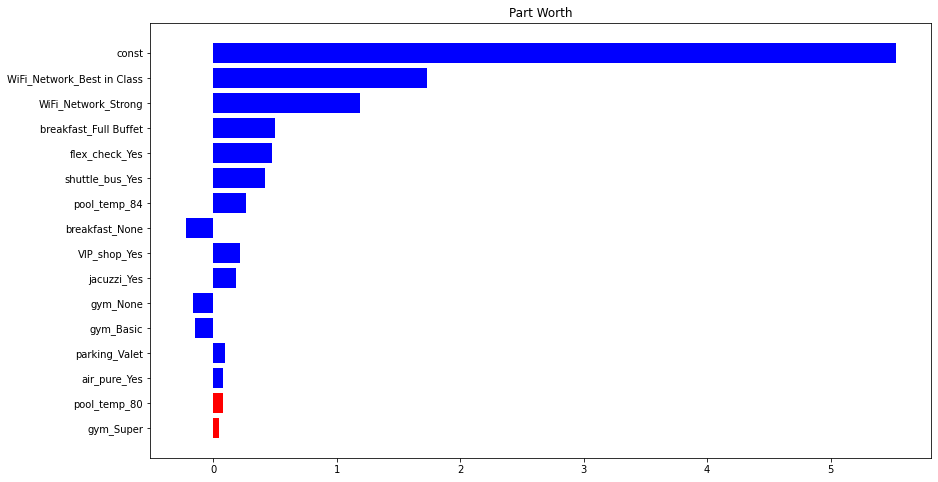

In [28]:
df_res = pd.DataFrame({
    'param_name': linearRegression.params.keys()
    , 'param_w': linearRegression.params.values
    , 'pval': linearRegression.pvalues
})
# adding field for absolute of parameters
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]

# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()

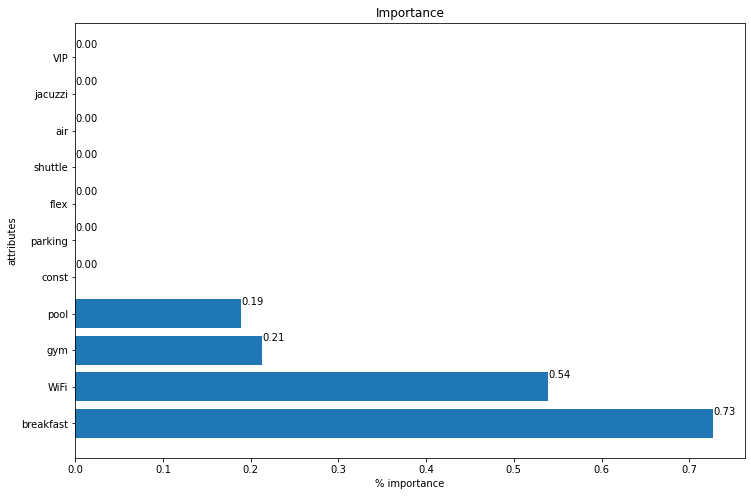

In [29]:
# need to assemble per attribute for every level of that attribute in dicionary
range_per_feature = dict()
for key, coeff in linearRegression.params.items():
    sk =  key.split('_')
    feature = sk[0]
    if len(sk) == 1:
        feature = key
    if feature not in range_per_feature:
        range_per_feature[feature] = list()
        
    range_per_feature[feature].append(coeff)
# importance per feature is range of coef in a feature
# while range is simply max(x) - min(x)
importance_per_feature = {
    k: max(v) - min(v) for k, v in range_per_feature.items()
}

# compute relative importance per feature
# or normalized feature importance by dividing 
# sum of importance for all features
total_feature_importance = sum(importance_per_feature.values())
relative_importance_per_feature = {
    k: 100 * round(v/total_feature_importance, 3) for k, v in importance_per_feature.items()
}

alt_data = pd.DataFrame(
    list(importance_per_feature.items()), 
    columns=['attr', 'importance']
).sort_values(by='importance', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Importance')
plt.barh(xbar, alt_data['importance'])
for i, v in enumerate(alt_data['importance']):
    ax.text(v , i + .25, '{:.2f}'.format(v))
plt.ylabel('attributes')
plt.xlabel('% importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()

# Conjoint Analysis

Conjoint Analysis is a technique used to understand preference or relative importance given to various attributes of a product by the customer while making purchase decisions.Here, wee do some conjoint analysis and plot some graph of conjoint analysis.

*Recommndations About New Hotel:*

Here, we have some recommendations about new hotel. You need to add some facilities for the customers. The some facilities are strong WiFi Network, Continential Breakfast, Parking OpenLot, gym Advanced, flex_check, shuttle bus, pure air, jacuzzi, Vip Shop, pool temperature is 76. If we provide these facilities to the customers, then we make a new luxiours hotel. in this luxiours hotel, you earn 250$ per night.

# Forecasting Net Income

In [28]:
df = pd.read_csv("C:/Users/sa/Documents/fid_416603781_files (1)/file-416603781-annual-report(31).csv")
df.head()

,Date,NetIncome
0,3/31/2021,901.0
1,12/31/2020,17.0
2,9/30/2020,-710.0
3,6/30/2020,-4721.0
4,3/31/2020,460.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       40 non-null     object 
 1   NetIncome  40 non-null     float64
dtypes: float64(1), object(1)
memory usage: 768.0+ bytes


In [30]:
df['Date']= pd.to_datetime(df['Date'])
df['NetIncome'].astype(float)
 
# Check the format of 'Date' column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       40 non-null     datetime64[ns]
 1   NetIncome  40 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 768.0 bytes


In [33]:
df = df.groupby('Date')['NetIncome'].sum().reset_index()

In [34]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2011-06-30', '2011-09-30', '2011-12-31', '2012-03-31',
               '2012-06-30', '2012-09-30', '2012-12-31', '2013-03-31',
               '2013-06-30', '2013-09-30', '2013-12-31', '2014-03-31',
               '2014-06-30', '2014-09-30', '2014-12-31', '2015-03-31',
               '2015-06-30', '2015-09-30', '2015-12-31', '2016-03-31',
               '2016-06-30', '2016-09-30', '2016-12-31', '2017-03-31',
               '2017-06-30', '2017-09-30', '2017-12-31', '2018-03-31',
               '2018-06-30', '2018-09-30', '2018-12-31', '2019-03-31',
               '2019-06-30', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [35]:
y = df['NetIncome'].resample('MS').mean()
y['2020':]

Date
2020-01-01       NaN
2020-02-01       NaN
2020-03-01     460.0
2020-04-01       NaN
2020-05-01       NaN
2020-06-01   -4721.0
2020-07-01       NaN
2020-08-01       NaN
2020-09-01    -710.0
2020-10-01       NaN
2020-11-01       NaN
2020-12-01      17.0
2021-01-01       NaN
2021-02-01       NaN
2021-03-01     901.0
Freq: MS, Name: NetIncome, dtype: float64

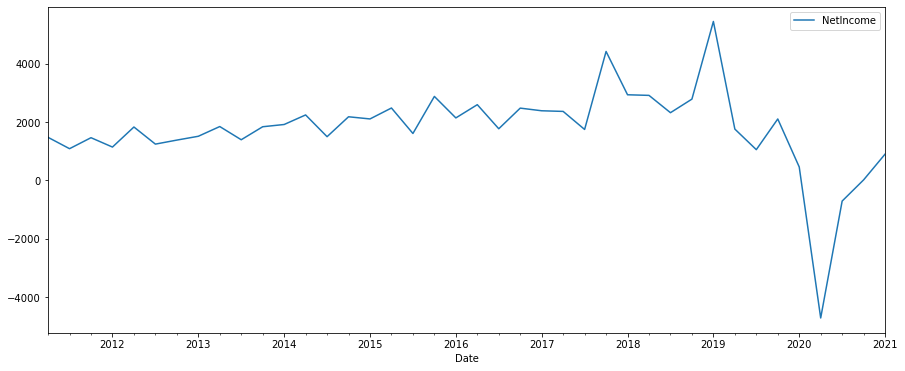

In [37]:
df.plot(figsize=(15, 6))
plt.show()

In [38]:
import itertools
import statsmodels.api as sm

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [39]:
import warnings
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
        except:
            continue

In [40]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7191      0.319     -2.253      0.024      -1.345      -0.093
ma.L1         31.4584    550.946      0.057      0.954   -1048.375    1111.292
ar.S.L12      -0.6646      0.217     -3.060      0.002      -1.090      -0.239
sigma2       961.4563   3.33e+04      0.029      0.977   -6.44e+04    6.63e+04


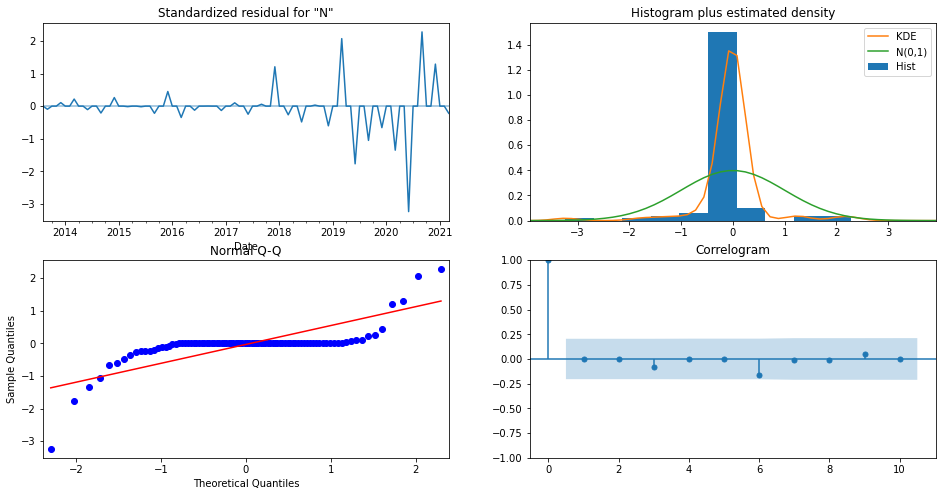

In [41]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

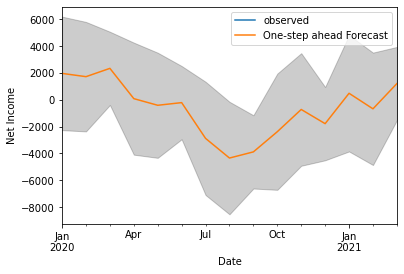

In [42]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha  = .2)
ax.set_xlabel('Date')
ax.set_ylabel('Net Income')
plt.legend()
plt.show()

In [43]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
y_forecasted

The Mean Squared Error of our forecasts is 7454485.67


Date
2020-01-01    1967.640309
2020-02-01    1723.535225
2020-03-01    2342.668061
2020-04-01      84.646974
2020-05-01    -408.981505
2020-06-01    -211.411893
2020-07-01   -2876.799463
2020-08-01   -4342.780265
2020-09-01   -3883.348231
2020-10-01   -2379.618449
2020-11-01    -721.492654
2020-12-01   -1779.474592
2021-01-01     484.901526
2021-02-01    -673.354024
2021-03-01    1207.829694
Freq: MS, Name: predicted_mean, dtype: float64

In [44]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 2730.29


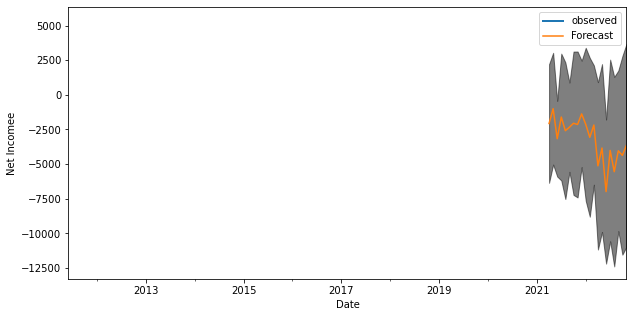

In [45]:
pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(10, 5), lw =2)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('Net Incomee')
plt.legend()
plt.show()

In [46]:
pred_ci

,lower NetIncome,upper NetIncome
2021-04-01,-6352.124838,2216.183913
2021-05-01,-5034.267840,3036.564047
2021-06-01,-5897.223518,-434.276521
2021-07-01,-6182.941728,2977.790792
2021-08-01,-7522.124218,2346.252380
2021-09-01,-5558.775746,887.104420
2021-10-01,-7225.445435,3125.607276
2021-11-01,-7407.398038,3131.113832
2021-12-01,-5216.401051,2466.526026
2022-01-01,-7647.319766,3399.106041


## Forecasting Description:

First of all, we collect the data from the online website. In this data, only 2 fields are available. These 2 fields are Date and Net Income of Disney Walt. By using these two fields, we can predict the future net income of Disney Walt. For this purpose, we use ARIMA Model.

***ARIMA Model:***

An ARIMA (Autoregressive integrated moving average) model is a class of statistical models for analyzing and forecasting time series data. It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts. It is the best model for time series.

***Prediction:***

We predict the net income using ARIMA Model of next year 2021. The above table shows the prediuction of Net income of the next year from 01-04-2021 to 01-03-2022.

## Classification

In [3]:
data = pd.read_csv("C:/Users/sa/Documents/fid_416603781_files (1)/416603781_cruise_returners_8798167447200454.csv")
data.head()  

,hhold_ID,discount_original,coupon_received,cabin_type,est_inc,season_of_year,ticket_spend,cruise_theme,incidental_spending,park_package,embark_port,res_to_port,number_children,oldest_child_age,dis_plus_sub,return_1065
0,3598,1,1,Verandah,19280.985,Winter,2649,prin_fro,2898.754343,1,Vancouver,558,3,6.0,1,0
1,155,1,0,Concierge,825719.960,Spring,2941,Star Wars,2898.754343,1,Port Canaveral,280,3,8.0,1,0
2,353,1,0,Oceanview,3755246.459,Fall,2609,Marvel,11750.829360,1,Port Canaveral,351,3,3.0,1,0
3,1474,1,1,Oceanview,96831.550,Winter,2367,Marvel,13945.343510,1,Copenhagen,314,3,7.0,0,0
4,3272,1,0,Verandah,11027.249,Spring,3021,Marvel,2898.754343,1,Copenhagen,342,4,10.0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hhold_ID             7500 non-null   int64  
 1   discount_original    7500 non-null   int64  
 2   coupon_received      7500 non-null   int64  
 3   cabin_type           7500 non-null   object 
 4   est_inc              7500 non-null   float64
 5   season_of_year       7500 non-null   object 
 6   ticket_spend         7500 non-null   int64  
 7   cruise_theme         6250 non-null   object 
 8   incidental_spending  7500 non-null   float64
 9   park_package         7500 non-null   int64  
 10  embark_port          7500 non-null   object 
 11  res_to_port          7500 non-null   int64  
 12  number_children      7500 non-null   int64  
 13  oldest_child_age     7130 non-null   float64
 14  dis_plus_sub         7500 non-null   int64  
 15  return_1065          7500 non-null   i

In [6]:
data.isna().sum()

hhold_ID                  0
discount_original         0
coupon_received           0
cabin_type                0
est_inc                   0
season_of_year            0
ticket_spend              0
cruise_theme           1250
incidental_spending       0
park_package              0
embark_port               0
res_to_port               0
number_children           0
oldest_child_age        370
dis_plus_sub              0
return_1065               0
dtype: int64

In [17]:
data = data.dropna()
data.shape

(5941, 16)

In [18]:
X = data.drop(['return_1065'], axis=1)

y = data['return_1065']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((3980, 15), (1961, 15))

In [14]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=["cabin_type", "season_of_year", "cruise_theme",
        "embark_port"])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
X_train.head()

C:\Users\sa\anaconda3\ANAKONDA\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,hhold_ID,discount_original,coupon_received,cabin_type,est_inc,season_of_year,ticket_spend,cruise_theme,incidental_spending,park_package,embark_port,res_to_port,number_children,oldest_child_age,dis_plus_sub
3151,2918,0,0,1,117788.156,1,2284,1,1486.513143,0,1,21,2,10.0,0
4019,7387,1,0,2,31750.238,2,2122,2,5815.534755,0,1,24,2,7.0,1
4194,1227,1,0,1,318477.190,2,1915,3,2964.414085,0,2,23,0,NaN,1
1825,1620,0,0,3,4707381.109,3,1889,2,45169.753030,1,3,57,3,7.0,0
7363,6797,0,0,3,699756.341,1,2759,3,2898.754343,0,1,50,1,2.0,0


In [5]:
conda install -c conda-forge category_encoders

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [29]:

X_train.head(25)

,hhold_ID,discount_original,coupon_received,cabin_type,est_inc,season_of_year,ticket_spend,cruise_theme,incidental_spending,park_package,embark_port,res_to_port,number_children,oldest_child_age,dis_plus_sub
204,1175,1,1,Concierge,526136.577,Winter,2261,prin_fro,12044.549600,1,Port Canaveral,46,5,3.0,0
3847,4867,0,0,Verandah,80090.535,Summer,1892,starwars,9813.645605,0,San Diego,22,2,8.0,0
6384,1695,0,1,Verandah,126371.239,Winter,2670,prin_fro,9096.917286,1,Copenhagen,30,2,9.0,0
4686,1281,0,0,Concierge,997.065,Winter,3053,Princess/Frozen,12351.265900,0,Port Canaveral,58,2,3.0,1
1954,3558,0,0,Inside,13817.781,Winter,1489,starwars,153.464998,0,New York,12,5,5.0,0
1670,4672,0,0,Concierge,4239.143,Fall,2885,Princess/Frozen,2898.754343,0,Port Canaveral,24,3,8.0,0
3524,380,0,0,Oceanview,459567.888,Spring,1645,Star Wars,2898.754343,0,Vancouver,93,1,5.0,0
4723,1477,0,0,Verandah,4895634.592,Summer,3019,prin_fro,52396.273740,0,New York,74,3,14.0,0
6499,2262,0,0,Inside,44226.547,Winter,1824,Marvel,11660.409290,1,Barcelona,40,2,4.0,0
7287,6405,0,0,Verandah,297316.819,Fall,1759,Marvel,13597.590750,0,Copenhagen,29,3,16.0,0


# KNN

In [73]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train1, y_train)
y_pred = knn.predict(X_test1)

In [72]:
X_test1 = X_test[["discount_original","coupon_received","est_inc","incidental_spending","res_to_port","number_children"]]

In [57]:
X_train.drop(columns=['season_of_year','cruise_theme','embark_port']
  , inplace=True)

C:\Users\sa\anaconda3\ANAKONDA\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [69]:
X_train1 = X_train[["discount_original","coupon_received","est_inc","incidental_spending","res_to_port","number_children"]]

In [28]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


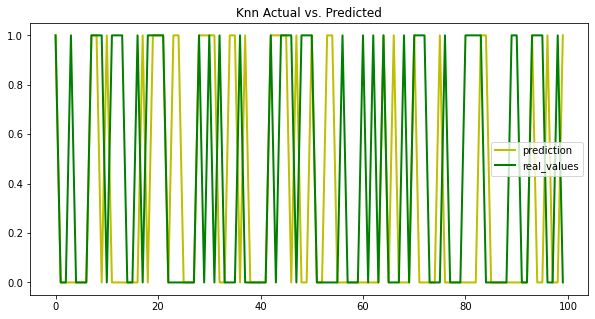

In [74]:
#Plot Knn Actual vs. Predicted
plt.figure(figsize=(10,5))
plt.plot(knn.predict(X_test1[-100:]), "y", label="prediction", linewidth=2.0)
plt.plot(y_test.values[-100:], "g", label="real_values", linewidth=2.0)
plt.title("Knn Actual vs. Predicted")
plt.legend(loc="best")

## Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train1, y_train)
y_pred = logreg.predict(X_test1)
print('Model accuracy score with index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score with index: 51.5553


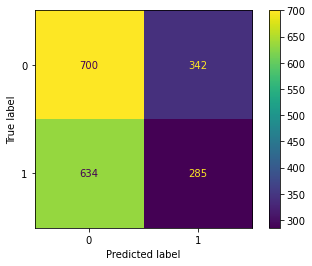

In [76]:
cm = confusion_matrix(y_test,  y_pred)
plot_confusion_matrix(knn, X_test1, y_test)  
plt.show()

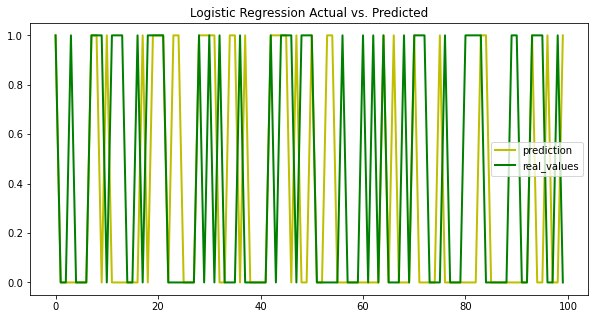

In [77]:
#Plot Logistic Regression Actual vs. Predicted
plt.figure(figsize=(10,5))
plt.plot(knn.predict(X_test1[-100:]), "y", label="prediction", linewidth=2.0)
plt.plot(y_test.values[-100:], "g", label="real_values", linewidth=2.0)
plt.title("Logistic Regression Actual vs. Predicted")
plt.legend(loc="best")

## Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train1, y_train)
y_pred = clf.predict(X_test1)
print('Model accuracy score with index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score with index: 53.9521


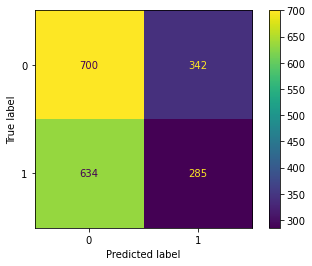

In [79]:
cm = confusion_matrix(y_test,  y_pred)
plot_confusion_matrix(knn, X_test1, y_test)  
plt.show()

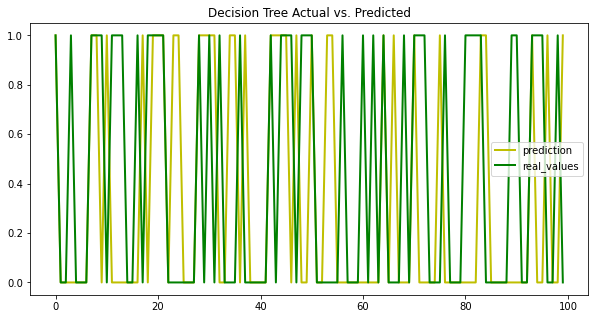

In [80]:
#Plot  Actual vs. Predicted
plt.figure(figsize=(10,5))
plt.plot(knn.predict(X_test1[-100:]), "y", label="prediction", linewidth=2.0)
plt.plot(y_test.values[-100:], "g", label="real_values", linewidth=2.0)
plt.title("Decision Tree Actual vs. Predicted")
plt.legend(loc="best")

## Classification Description

We use some classification algorithm which is used to classify the data. We tries to draw some conclusion from the input values given for training and we will predict the class labels/categories for the new data. Here, we use some classification algorithms to find the accuracy of the model. There are 3 classification algorithms which is used to predict the data that is as follows:

**1. KNN:**

KNN is the supervised machine learning algorithms which is used to solve both classification and regression predictive problems. It is commonly used for classification problems. It gives highly compatible results. KNN uses similarity feature to predict the classes. The most similar data is used to predict the value. The new value can be predicted by assigned the value which is most close to the values of the training datasets. The model accuracy score of KNN is 50.2835

**2. Logistic Regression:**

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. The model accuracy score of Logistic Regression is 53.2381

**Decisioin Tree:**

A decision tree is also a most popular algorithm which is used to solve classification problems. It makes the decision and uses a tree-like model of the decisions. It gives most accurate prediction of the datasets.

**Gini Index:**

We can implement Decision tree by using Gini Index. It is the name of the cost function that is used to find the binary splits in the datasets. The best value of gini index is 0 and the worst value of gini index is 0. We can create the splits in the datasets by using the following three parts that is as follows:

1.Calculate the value of gini index.
2.Split the dataset.
3.Evaluate all the splits of datasets.

After splitting the datasets, we create the nodes of the trees. It can be done by using Maximum tree depths and Minimum Nodes record. We can make the final prediction using terminal node. The model accuracy score of Decision Tree is 60.6323

**Model Results:**

The Decision tree is the best algorithm than the Logistic Regression and KNN Because the accuracy of Decision Tree is greater than the accuracy of Logistic Regression and KNN.

We can predict whether the particular household who embarks on a Disney Cruise will purchase tickets for a follow-up voyage. We can get the actual value as well as predicted value by train the model. We use three classification lagorithms to train the model. So that, we predict that whether a particular household who embarks on a Disney Cruise will purchase tickets for a follow-up voyage.



**A/B Testing**

In [37]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy, scipy.stats 
ab = pd.read_csv("C:/Users/sa/Documents/fid_416603781_files (1)/file-416603781-buckets(32).csv")
ab.head() 

,Location,Buckets,Q1SalesUSD
0,Disneyland Paris,Cinderella,139413.1
1,Disneyland Paris,Star_Wars,138890.4
2,Disneyland Paris,Mermaid,117696.4
3,Disneyland Paris,MickeySuit,176821.9
4,Disneyland Paris,MickeyEars,168442.1


In [38]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    36 non-null     object 
 1   Buckets     36 non-null     object 
 2   Q1SalesUSD  36 non-null     float64
dtypes: float64(1), object(2)
memory usage: 992.0+ bytes


In [39]:
ab.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["Q1SalesUSD"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
Q1SalesUSD,36.0,136381.397222,24598.006711,81159.8,85522.235,93985.175,99255.95,117696.4,139151.75,157672.2,167525.65,175180.3,176985.44,177073.5


C:\Users\sa\anaconda3\ANAKONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Q1SalesUSD', ylabel='Density'>

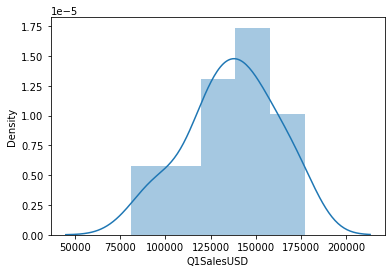

In [40]:
sns.distplot(ab.Q1SalesUSD)

In [41]:
# A/B Groups & Target Summary Stats
ab.groupby("Location").Q1SalesUSD.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
Location,,,,,
Disneyland Paris,6,139151.75,139147.966667,31016.829287,176821.9
Disneyland Resort,6,136203.00,133647.733333,33074.038741,174633.1
Hong Kong Disneyland Resort,6,143257.25,139667.800000,24732.125870,177073.5
Shanghai Disney Resort,6,132133.70,135183.366667,15212.543256,160508.9
Tokyo Disney Resort,6,147826.80,136902.150000,23881.617308,155995.0
Walt Disney World Resort,6,128938.45,133739.366667,26917.090645,166609.2


In [42]:
ab.groupby("Buckets").Q1SalesUSD.agg(["count", "median", "mean", "max"])

,count,median,mean,max
Buckets,,,,
Cinderella,6,135215.75,136139.850000,148417.8
Mermaid,6,122721.40,123628.983333,132883.5
MickeyEars,6,152454.00,154566.350000,168442.1
MickeySuit,6,168215.60,167465.233333,177073.5
RedWhite,6,95140.45,96923.400000,114139.2
Star_Wars,6,141632.35,139564.566667,155995.0


In [43]:
#Outliers
ab = ab[ab.Q1SalesUSD < ab.Q1SalesUSD.max()]

# Summary Stats: sum_gamerounds
ab.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["Q1SalesUSD"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
Q1SalesUSD,35.0,135218.765714,23932.509606,81159.8,85397.594,93961.09,98639.82,117360.18,138890.4,156330.44,164684.76,170299.4,176077.708,176821.9


In [44]:
ab.groupby('Buckets').describe()['Q1SalesUSD'] 

,count,mean,std,min,25%,50%,75%,max
Buckets,,,,,,,,
Cinderella,6.0,136139.850000,8362.372118,128031.7,128860.350,135215.75,141216.100,148417.8
Mermaid,6.0,123628.983333,6882.250179,116015.3,118180.575,122721.40,128754.350,132883.5
MickeyEars,6.0,154566.350000,11395.606430,141166.3,146513.325,152454.00,164374.950,168442.1
MickeySuit,5.0,165543.580000,9791.205579,153955.9,160508.900,161798.10,174633.100,176821.9
RedWhite,6.0,96923.400000,10895.539817,81159.8,93744.325,95140.45,100796.275,114139.2
Star_Wars,6.0,139564.566667,11778.816778,122046.4,133260.525,141632.35,144616.625,155995.0


In [48]:
 
observed = ab['Q1SalesUSD'] 
Ratio = ab['Q1SalesUSD'] /len(ab)
expected = Ratio*len(ab)

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 4)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=4)
print("P value")
print(p_value)

stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)

3.854335246573083e-27
Critical value
9.487729036781154
P value
1.0


Power_divergenceResult(statistic=3.854335246573083e-27, pvalue=1.0)

In [47]:
from scipy import stats
t, p = stats.ttest_ind(observed, expected , equal_var=False)
p

1.0

In [49]:
t

0.0

## A/B Testing

A/B testing is a basic randomized control experiment. It is a way to compare the two versions of a variable to find out which performs better in a controlled environment. For instance, let's say you own a company and want to increase the sales of your product. Here, we use some steps to perform A/B Testing.


Understanding business problem & data
Detect and resolve problems in the data (Missing Value, Outliers, Unexpected Value)
Look summary stats and plots
Apply hypothesis testing and check assumptions
Check Normality & Homogeneity
Apply tests
Evaluate the results



Disney should increase the sale price of the Mermarid, Micky Suit, Mickey Ears, Red White. So that, Disney could earn more profit from these buckets.

## Conclusion

We conclude that from the above results that how to compute the summary statistics of disney movies. Snow white is the top grossed movie in Disney Walt. We also calculate some statics of movies dataset. Then, we segment the house hold family into different group of families. We convert the disney families into 5 families with respect to the net income,estimate net income, annual travel, annual leisure and annual household FICO.

Then, we do some conjoint analysis. We give some recommendations about new hotel. You need to add some facilities for the customers. If you provide these facilities to the customers, then you make a new luxiours hotel. In this luxiours hotel, you earn 250$ per night.

Then, we do some forecasting on the dataset. First, we collect the data from the website then we predict the net income of the next 1 year using ARIMA Model. After this we apply some classification algorithm on the cruise_returners dataset. we predict the data by applying some classification algorithm such as knn, logistic regrerssion and Decision Tree.

At the end, we do A/B Testing on popcorn buckets dataset. After testing, we observed that Disney should increase the sale price of the Mermarid, Micky Suit, Mickey Ears, Red White. So that, Disney could earn more profit from these buckets.

## References

disney research,2019,2021,https://la.disneyresearch.com/datasets/